In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] # 设置字体为黑体，解决Matplotlib中文乱码问题
plt.rcParams['axes.unicode_minus']=False # 解决Matplotlib坐标轴负号'-'显示为方块的问题

高真空获得

In [3]:
t = [0, 15, 30, 45, 60, 90, 120, 150, 180, 210, 240, 270, 300]
g_1 = [1.0e5, 9.1e2, 2.9e1, 1.4e1, 1.1e1, 7.4, 5.8, 4.7, 3.9, 3.3, 2.7, 2.3, 1.9]
g_2 = [1.7, 1.6, 1.4, 1.2, 9.7e-1, 1.9e-1, 5.7e-2, 1.3e-2, 9.1e-3, 7.3e-3, 6.0e-3, 5.3e-3, 4.8e-3]
g_3 = [3.8e-3, 3.7e-3, 3.6e-3, 3.5e-3, 3.4e-3, 3.2e-3, 3.1e-3, 3.0e-3, 2.8e-3, 2.7e-3, 2.6e-3, 2.5e-3, 2.4e-3]
g_4 = [2.3e-3, 2.2e-3, 2.2e-3, 2.2e-3, 2.2e-3, 2.1e-3, 2.1e-3, 2.0e-3, 2.0e-3, 2.0e-3, 2.0e-3, 2.0e-3, 2.1e-3]
g_5 = [1.2, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.8, 3.2, 3.6, 4.0, 4.4]

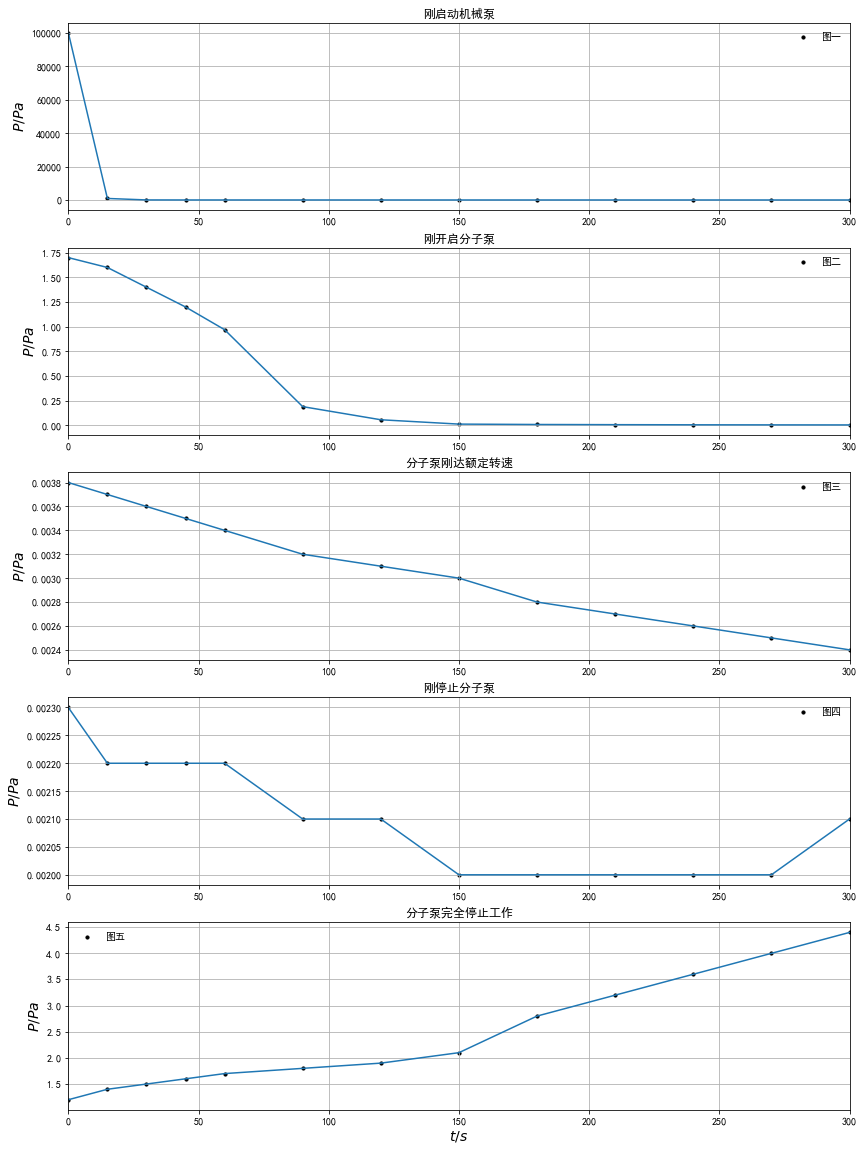

In [4]:
fig, axs = plt.subplots(5, 1, figsize = (14, 20))

axs[0].plot(t, g_1)
axs[0].scatter(t, g_1, s =10, c = 'k', label = '图一')
axs[0].set_title('刚启动机械泵')
axs[0].set_xlim(0, 300)
axs[0].set_ylabel(r'$P/Pa$', fontsize = 14)
axs[0].grid()
axs[0].legend(frameon = False)

axs[1].plot(t, g_2)
axs[1].scatter(t, g_2, s =10, c = 'k', label = '图二')
axs[1].set_title('刚开启分子泵')
axs[1].set_xlim(0, 300)
axs[1].set_ylabel(r'$P/Pa$', fontsize = 14)
axs[1].grid()
axs[1].legend(frameon = False)

axs[2].plot(t, g_3)
axs[2].scatter(t, g_3, s =10, c = 'k', label = '图三')
axs[2].set_title('分子泵刚达额定转速')
axs[2].set_xlim(0, 300)
axs[2].set_ylabel(r'$P/Pa$', fontsize = 14)
axs[2].grid()
axs[2].legend(frameon = False)

axs[3].plot(t, g_4)
axs[3].scatter(t, g_4, s =10, c = 'k', label = '图四')
axs[3].set_title('刚停止分子泵')
axs[3].set_xlim(0, 300)
axs[3].set_ylabel(r'$P/Pa$', fontsize = 14)
axs[3].grid()
axs[3].legend(frameon = False)

axs[4].plot(t, g_5)
axs[4].scatter(t, g_5, s =10, c = 'k', label = '图五')
axs[4].set_title('分子泵完全停止工作')
axs[4].set_xlim(0, 300)
axs[4].set_ylabel(r'$P/Pa$', fontsize = 14)
axs[4].grid()
axs[4].set_xlabel(r'$t/s$', fontsize = 14)
axs[4].legend(frameon = False)

plt.show()

验证帕邢定律

In [5]:
p = [2, 3.9, 6, 8, 10, 12, 14, 16, 18, 20, 31, 39, 51, 59, 71, 80, 89, 97]
U_1 = [971, 723, 599, 535, 525, 546, 535, 523, 548, 552, 605, 635, 676, 705, 744, 726, 714, 703]
U_2 = [928, 711, 597, 536, 529, 533, 537, 537, 553, 564, 605, 635, 679, 707, 751, 726, 714, 705]
U_3 = [908, (677+682)/2, 592, 546, 543, 525, 546, 539, 554, 559, 608, 638, 683, 704, 749, 729, 714, 699]

In [6]:
U, err= [], []
for i in range(len(p)):
    U.append(np.mean([U_1[i], U_2[i], U_3[i]]))
    err.append(np.std([U_1[i], U_2[i], U_3[i]]))

In [7]:
P = []
for i in range(len(p)):
    P.append(np.log(p[i]))

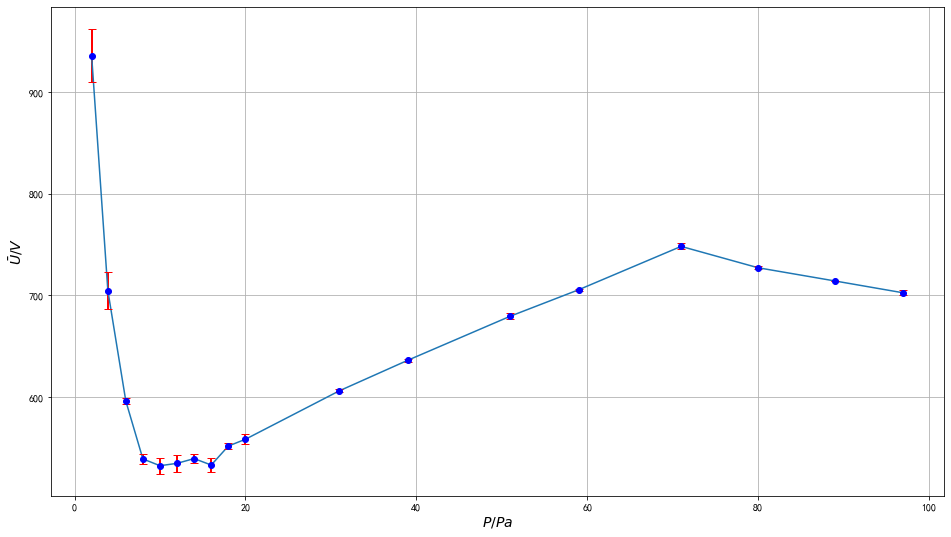

In [8]:
plt.subplots(figsize = (16, 9))
plt.plot(p, U)
plt.errorbar(p, U, err, fmt = 'o', ecolor='r', color='b', elinewidth=2, capsize=4)

plt.ylabel(r'$\bar{U}/V$', fontsize = 14)
plt.xlabel(r'$P/Pa$', fontsize = 14)
plt.grid()
plt.show()

帕邢定律$V_s=\frac{Bpd}{ln\left(\frac{Apd}{ln(1+\frac{1}{\gamma})}\right)}$


In [9]:
def px(x, a, b, g):
    return (b * x)/(np.log((a*x)/np.log(1+g)))

In [16]:
 popt

array([0.01437759, 0.72686641, 6.79468569])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


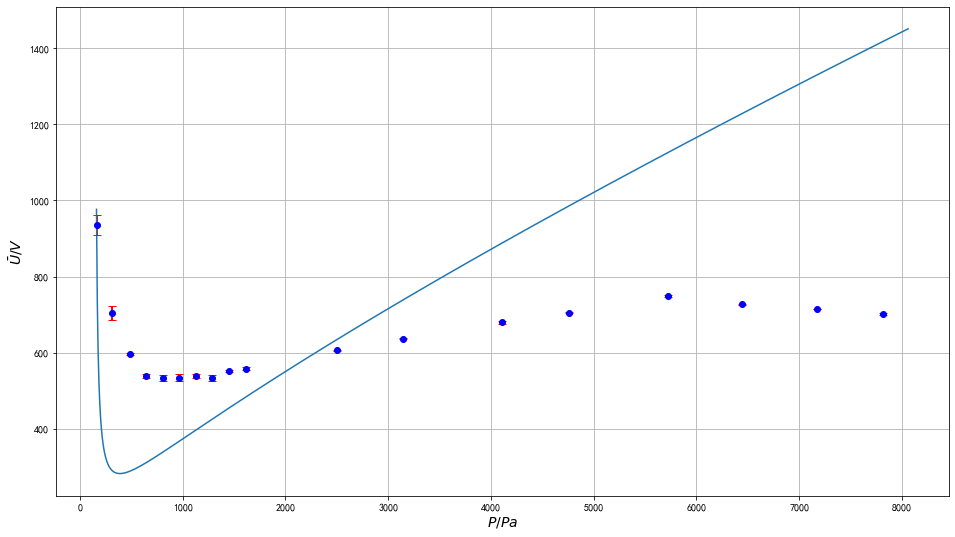

In [15]:
pd = [p[i]*80.6 for i in range(len(p))]
popt, pcov = curve_fit(px, pd[:14], U[:14] )

plt.subplots(figsize = (16, 9))
p_dense = np.linspace(2, 100, 1000)
plt.plot(p_dense*80.6, px(p_dense*80.5, popt[0], popt[1], popt[2]))
plt.errorbar(pd, U, err, fmt = 'o', ecolor='r', color='b', elinewidth=2, capsize=4)

plt.ylabel(r'$\bar{U}/V$', fontsize = 14)
plt.xlabel(r'$P/Pa$', fontsize = 14)
plt.grid()
plt.show()

气体光谱

In [11]:
df_sa = pd.read_csv(r'C:\Users\31260\Desktop\D2 实验数据\实验三、四\12Pa820uA458V空气.txt', sep = '\t')
dt_sa = df_sa.head(2050)
df_sar = pd.read_csv(r'C:\Users\31260\Desktop\D2 实验数据\实验三、四\20Pa300uA326V氩气.txt', sep = '\t')
dt_sar = df_sar.head(2050)
df_sne = pd.read_csv(r'C:\Users\31260\Desktop\D2 实验数据\实验三、四\20Pa520uA448V氖气.txt', sep = '\t')
dt_sne = df_sne.head(2050)
df_she = pd.read_csv(r'C:\Users\31260\Desktop\D2 实验数据\实验三、四\60Pa120uA347V氦气.txt', sep = '\t')
dt_she = df_she.head(2050)

AttributeError: 'list' object has no attribute 'read_csv'

In [ ]:
plt.subplots(figsize = (16, 9))
plt.plot(dt_sa['gamma'], dt_sa['count'])

plt.vlines(656, 0, 500, ls = '--', lw = 1)
plt.text(620, 480, r'$656nm$', fontsize = 10, c = 'cyan')
plt.annotate(r"$H^2$", fontsize = 15, xytext = (600, 300), xy=(656, 200),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'cyan'})

plt.vlines(428, 0, 500, ls = '--', lw = 1)
plt.text(420, 480, r'$428nm$', fontsize = 10, c = 'navy')
#plt.annotate(r"$H^2$", fontsize = 15, xytext = (600, 300), xy=(434, 200),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'cyan'})

plt.vlines(470, 0, 500, ls = '--', lw = 1)
plt.text(440, 470, r'$470nm$', fontsize = 10, c = 'navy')
#plt.annotate(r"$N^2$", fontsize = 15, xytext = (600, 300), xy=(451, 200),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'cyan'})

plt.vlines(392, 0, 500, ls = '--', lw = 1)
plt.text(370, 480, r'$392nm$', fontsize = 10, c = 'navy')
plt.annotate(r"$N^2$", fontsize = 15, xytext = (450, 400), xy=(392, 300),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'navy'})

plt.vlines(772, 0, 500, ls = '--', lw = 1)
plt.text(772, 460, r'$772nm$', fontsize = 10, c = 'magenta')
plt.annotate(r"$Ar$", fontsize = 15, xytext = (800, 300), xy=(772, 300),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'magenta'})

plt.vlines(750, 0, 500, ls = '--', lw = 1)
plt.text(750, 480, r'$750nm$', fontsize = 10, c = 'magenta')
plt.annotate(r"$Ar$", fontsize = 15, xytext = (800, 300), xy=(750, 300),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'magenta'})

plt.vlines(763, 0, 500, ls = '--', lw = 1)
plt.text(763, 470, r'$763nm$', fontsize = 10, c = 'magenta')
plt.annotate(r"$Ar$", fontsize = 15, xytext = (800, 300), xy=(763, 300),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'magenta'})

plt.vlines(660, 0, 500, ls = '--', lw = 1)
plt.text(660, 480, r'$660nm$', fontsize = 10, c = 'gold')
plt.annotate(r"$He$", fontsize = 15, xytext = (700, 450), xy=(660, 300),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'gold'})

plt.vlines(668, 0, 500, ls = '--', lw = 1)
plt.text(668, 470, r'$668nm$', fontsize = 10, c = 'gold')
plt.annotate(r"$He$", fontsize = 15, xytext = (700, 450), xy=(668, 300),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'gold'})

plt.vlines(668, 0, 500, ls = '--', lw = 1)
plt.annotate(r"$Ne$", fontsize = 15, xytext = (700, 400), xy=(668, 300),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'black'})

plt.vlines(725, 0, 500, ls = '--', lw = 1)
plt.text(725, 470, r'$725nm$', fontsize = 10, c = 'k')
plt.annotate(r"$Ne$", fontsize = 15, xytext = (700, 400), xy=(725, 300),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'black'})

plt.title(r'$air$', fontsize = 14)
plt.xlim(333, 1065)
plt.ylim(-10, 500)
plt.ylabel(r'$count$', fontsize = 14)
plt.xlabel(r'$\lambda/nm$', fontsize = 14)
plt.grid()
plt.show()

In [ ]:
plt.subplots(figsize = (16, 9))
plt.plot(dt_sar['gamma'], dt_sar['count'])

plt.vlines(696, 0, 2000, ls = '--', lw = 1)
plt.text(696, 1950, r'$696nm$', fontsize = 10, c = 'magenta')

plt.vlines(706, 0, 2000, ls = '--', lw = 1)
plt.text(706, 1900, r'$706nm$', fontsize = 10, c = 'magenta')

plt.vlines(738, 0, 2000, ls = '--', lw = 1)
plt.text(738, 1850, r'$738nm$', fontsize = 10, c = 'magenta')

plt.vlines(750, 0, 2000, ls = '--', lw = 1)
plt.text(750, 1950, r'$750nm$', fontsize = 10, c = 'magenta')

plt.vlines(763, 0, 2000, ls = '--', lw = 1)
plt.text(763, 1900, r'$763nm$', fontsize = 10, c = 'magenta')

plt.vlines(772, 0, 2000, ls = '--', lw = 1)
plt.text(772, 1850, r'$772nm$', fontsize = 10, c = 'magenta')

plt.vlines(795, 0, 2000, ls = '--', lw = 1)
plt.text(795, 1950, r'$795nm$', fontsize = 10, c = 'magenta')

plt.vlines(801, 0, 2000, ls = '--', lw = 1)
plt.text(801, 1900, r'$801nm$', fontsize = 10, c = 'magenta')

plt.vlines(811, 0, 2000, ls = '--', lw = 1)
plt.text(811, 1850, r'$811nm$', fontsize = 10, c = 'magenta')

plt.vlines(826, 0, 2000, ls = '--', lw = 1)
plt.text(826, 1800, r'$826nm$', fontsize = 10, c = 'magenta')

plt.vlines(841, 0, 2000, ls = '--', lw = 1)
plt.text(841, 1750, r'$841nm$', fontsize = 10, c = 'magenta')
plt.annotate(r"$Ar$", fontsize = 15, xytext = (900, 1600), xy=(841, 1500),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'magenta'})

plt.title(r'$Ar$', fontsize = 14)
plt.xlim(333, 1065)
plt.ylim(-10, 2000)
plt.ylabel(r'$count$', fontsize = 14)
plt.xlabel(r'$\lambda/nm$', fontsize = 14)
plt.grid()
plt.show()

In [ ]:
plt.subplots(figsize = (16, 9))
plt.plot(dt_sne['gamma'], dt_sne['count'])

plt.vlines(585, 0, 3500, ls = '--', lw = 1)
plt.text(585, 3425, r'$585nm$', fontsize = 10, c = 'orange')

plt.vlines(594, 0, 3500, ls = '--', lw = 1)
plt.text(594, 3340, r'$594nm$', fontsize = 10, c = 'orange')

plt.vlines(609, 0, 3500, ls = '--', lw = 1)
plt.text(609, 3255, r'$609nm$', fontsize = 10, c = 'orange')

plt.vlines(614, 0, 3500, ls = '--', lw = 1)
plt.text(614, 3170, r'$614nm$', fontsize = 10, c = 'orange')

plt.vlines(627, 0, 3500, ls = '--', lw = 1)
plt.text(627, 3085, r'$627nm$', fontsize = 10, c = 'orange')

plt.vlines(633, 0, 3500, ls = '--', lw = 1)
plt.text(633, 3000, r'$633nm$', fontsize = 10, c = 'orange')

plt.vlines(640, 0, 3500, ls = '--', lw = 1)
plt.text(640, 2915, r'$640nm$', fontsize = 10, c = 'orange')

plt.vlines(651, 0, 3500, ls = '--', lw = 1)
plt.text(651, 2830, r'$651nm$', fontsize = 10, c = 'orange')

plt.vlines(660, 0, 3500, ls = '--', lw = 1)
plt.text(660, 2745, r'$660nm$', fontsize = 10, c = 'orange')

plt.vlines(668, 0, 3500, ls = '--', lw = 1)
plt.text(668, 2660, r'$668nm$', fontsize = 10, c = 'orange')

plt.vlines(693, 0, 3500, ls = '--', lw = 1)
plt.text(693, 2575, r'$693nm$', fontsize = 10, c = 'orange')

plt.vlines(703, 0, 3500, ls = '--', lw = 1)
plt.text(703, 2490, r'$703nm$', fontsize = 10, c = 'orange')

plt.vlines(725, 0, 3500, ls = '--', lw = 1)
plt.text(725, 2405, r'$725nm$', fontsize = 10, c = 'orange')
plt.annotate(r"$Ne$", fontsize = 15, xytext = (900, 1600), xy=(725, 1500),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'orange'})

plt.title(r'$Ne$', fontsize = 14)
plt.xlim(333, 1065)
plt.ylim(-10, 3500)
plt.ylabel(r'$count$', fontsize = 14)
plt.xlabel(r'$\lambda/nm$', fontsize = 14)
plt.grid()
plt.show()

In [ ]:
plt.subplots(figsize = (16, 9))
plt.plot(dt_she['gamma'], dt_she['count'])

plt.vlines(447, 0, 250, ls = '--', lw = 1)
plt.text(447, 240, r'$447nm$', fontsize = 10, c = 'black')

plt.vlines(502, 0, 250, ls = '--', lw = 1)
plt.text(502, 230, r'$502nm$', fontsize = 10, c = 'black')

plt.vlines(588, 0, 250, ls = '--', lw = 1)
plt.text(588, 220, r'$588nm$', fontsize = 10, c = 'black')

plt.vlines(668, 0, 250, ls = '--', lw = 1)
plt.text(668, 210, r'$668nm$', fontsize = 10, c = 'black')

plt.vlines(707, 0, 250, ls = '--', lw = 1)
plt.text(707, 200, r'$707nm$', fontsize = 10, c = 'black')
plt.annotate(r"$He$", fontsize = 15, xytext = (900, 160), xy=(707, 200),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'black'})

plt.title(r'$He$', fontsize = 14)
plt.xlim(333, 1065)
plt.ylim(-10, 250)
plt.ylabel(r'$count$', fontsize = 14)
plt.xlabel(r'$\lambda/nm$', fontsize = 14)
plt.grid()
plt.show()

四级质谱仪的使用与测量分析

In [ ]:
df_0 = pd.read_csv(r'C:\Users\31260\Desktop\D2 实验数据\实验三、四\本底.xls', sep = '\t')
dt_0 = df_0.head(2000)
df_ai = pd.read_csv(r'C:\Users\31260\Desktop\D2 实验数据\实验三、四\air.xls', sep = '\t')
dt_ai = df_ai.head(2000)
df_ar = pd.read_csv(r'C:\Users\31260\Desktop\D2 实验数据\实验三、四\Ar.xls', sep = '\t')
dt_ar = df_ar.head(2000)
df_he = pd.read_csv(r'C:\Users\31260\Desktop\D2 实验数据\实验三、四\He.xls', sep = '\t')
dt_he = df_he.head(2000)
df_ne = pd.read_csv(r'C:\Users\31260\Desktop\D2 实验数据\实验三、四\Ne.xls', sep = '\t')
dt_ne = df_ne.head(2000)

In [ ]:
plt.subplots(figsize = (16, 9))

plt.plot(df_0['X'], df_0['Y'])

plt.title('本底', fontsize = 14)
plt.ylim(0, 5e-13)
plt.xlim(0, 130)
plt.grid()
plt.show()

In [ ]:
plt.subplots(figsize = (16, 9))

y_air = [df_ai['Y'][i]-df_0['Y'][i] for i in range(len(df_ai['Y']))]
plt.plot(df_ai['X'], y_air)

plt.xlabel(r'$\frac{m}{e}/None$', fontsize = 14)
plt.ylabel(r'$Amp/V_?$', fontsize = 14)

plt.vlines(15, 0, 5e-13, ls = '--', lw = 1)
plt.text(13, 4e-13, r'$N_2^{++}$', fontsize = 10, c = 'black')

plt.vlines(17, 0, 5e-13, ls = '--', lw = 1)
plt.text(17, 3.5e-13, r'$O_2^{++}$', fontsize = 10, c = 'black')

plt.vlines(19, 0, 5e-13, ls = '--', lw = 1)
plt.text(19, 3e-13, r'$H_2O^{+}$', fontsize = 10, c = 'black')

plt.vlines(21, 0, 1e-12, ls = '--', lw = 1)
plt.text(21, 4.7e-13, r'$Ar^{++},(H_2O)$', fontsize = 10, c = 'black')

plt.vlines(45, 0, 5e-13, ls = '--', lw = 1)
plt.text(45, 3e-13, r'$CO_2^{+}$', fontsize = 10, c = 'black')

plt.vlines(29, 0, 5e-13, ls = '--', lw = 1)
plt.text(29, 4.6e-13, r'$N_2^{+}$', fontsize = 10, c = 'black')

plt.vlines(33, 0, 5e-13, ls = '--', lw = 1)
plt.text(33, 4e-13, r'$O_2^{+}$', fontsize = 10, c = 'black')

plt.vlines(41, 0, 5e-13, ls = '--', lw = 1)
plt.text(41, 4e-13, r'$Ar^{+}$', fontsize = 10, c = 'black')

plt.title(r'$air$', fontsize = 14)
plt.ylim(0, 5e-13)
plt.xlim(0, 130)
plt.grid()
plt.show()

In [ ]:
plt.subplots(figsize = (16, 9))

y_ar = [df_ar['Y'][i]-df_0['Y'][i] for i in range(len(df_ar['Y']))]
plt.plot(df_ar['X'], y_ar)

plt.xlabel(r'$\frac{m}{e}/None$', fontsize = 14)
plt.ylabel(r'$Amp/V_?$', fontsize = 14)

plt.vlines(29, 0, 1e-12, ls = '--', lw = 1)
plt.text(29, 4.6e-13, r'$N_2^{+}$', fontsize = 10, c = 'black')

plt.vlines(19, 0, 1e-12, ls = '--', lw = 1)
plt.text(19, 4e-13, r'$H_2O^{+}$', fontsize = 10, c = 'black')

plt.vlines(21, 0, 1e-12, ls = '--', lw = 1)
plt.text(21, 6e-13, r'$Ar^{++},(H_2O)$', fontsize = 10, c = 'black')

plt.vlines(37, 0, 1e-12, ls = '--', lw = 1)
plt.text(37, 4e-13, r'$Cl^{+}$', fontsize = 10, c = 'black')

plt.vlines(41, 0, 1e-12, ls = '--', lw = 1)
plt.text(41, 9e-13, r'$Ar^{+}$', fontsize = 10, c = 'black')

plt.title(r'$Ar$', fontsize = 14)
plt.ylim(0, 1e-12)
plt.xlim(0, 130)
plt.grid()
plt.show()

In [ ]:
plt.subplots(figsize = (16, 9))

y_he = [df_he['Y'][i]-df_0['Y'][i] for i in range(len(df_he['Y']))]
plt.plot(df_he['X'], y_he)

plt.xlabel(r'$\frac{m}{e}/None$', fontsize = 14)
plt.ylabel(r'$Amp/V_?$', fontsize = 14)

plt.vlines(4.5, 0, 1e-12, ls = '--', lw = 1)
plt.text(4.5, 6.5e-13, r'$He^{+}$', fontsize = 10, c = 'black')

plt.vlines(18.5, 0, 1e-12, ls = '--', lw = 1)
plt.text(18.5, 4e-13, r'$H_2O^{+}$', fontsize = 10, c = 'black')

plt.title(r'$He$', fontsize = 14)
plt.ylim(0, 0.8e-12)
plt.xlim(0, 130)
plt.grid()
plt.show()

In [ ]:
plt.subplots(figsize = (16, 9))

y_ne = [df_ne['Y'][i]-df_0['Y'][i] for i in range(len(df_ne['Y']))]
plt.plot(df_ne['X'], y_ne)

plt.xlabel(r'$\frac{m}{e}/None$', fontsize = 14)
plt.ylabel(r'$Amp/V_?$', fontsize = 14)

plt.vlines(19, 0, 1e-12, ls = '--', lw = 1)
plt.text(19, 4e-13, r'$H_2O^{+}$', fontsize = 10, c = 'black')

plt.vlines(21, 0, 1e-12, ls = '--', lw = 1)
plt.text(21, 5.1e-13, r'$Ne^{+}$', fontsize = 10, c = 'black')

plt.vlines(23, 0, 1e-12, ls = '--', lw = 1)
plt.text(23, 4.9e-13, r'$CO_2^{++}$', fontsize = 10, c = 'black')

plt.vlines(11, 0, 1e-12, ls = '--', lw = 1)
plt.text(11, 4e-13, r'$Ne^{++}$', fontsize = 10, c = 'black')

plt.title(r'$Ne$', fontsize = 14)
plt.ylim(0, 0.6e-12)
plt.xlim(0, 130)
plt.grid()
plt.show()